In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pylab import rcParams
import os


train_x = pd.read_csv(r"D:\github\DataScience\GST_Hackathon\resources\train\X_Train_Data_Input.csv")
train_y = pd.read_csv(r"D:\github\DataScience\GST_Hackathon\resources\train\Y_Train_Data_Target.csv")


## join dataset for analysis

In [2]:
df_train = pd.merge(train_x,train_y,on="ID")

In [3]:
#dropping the ID column
df_train_transformed=df_train.drop('ID', axis=1)

# dropping redundant columns 
df_train_transformed=df_train_transformed.drop(['Column3','Column10','Column11','Column12'], axis=1)


# Columns  to be considered in the model 
['Column0', 'Column1', 'Column2', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column9', 'Column13', 'Column14', 'Column15',
       'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21',
       'target']

# Train Data Preprocessing

### Prep - Column0
The data consists of real numbers, but there are some missing values. To address this, the strategy is to replace the missing values with zero. This approach is based on the assumption that when no data is available, it can reasonably be interpreted as zero or null.

In [4]:
df_train_transformed['Column0'] =  df_train_transformed['Column0'].fillna(0)

### Prep - Column4
This column contains missing values and, as noted, its values are highly correlated with those in column3. The strategy will be to replace the missing values with the median of the column


In [5]:
col4_median = df_train_transformed['Column4'].median()
df_train_transformed['Column4'] =  df_train_transformed['Column4'].fillna(col4_median)

### Prep - Column5
This column contains missing values and exhibits skewness. Transforming skewed data is crucial for enhancing the performance of statistical models and ensuring that normality assumptions are satisfied. Data cleaning will be necessary for the model, especially since a significant amount of data is missing. Given that this column consists of real numbers, we can replace the missing values with zero. Additionally, since the data is skewed and includes negative values, the Yeo-Johnson transformation can be applied.

In [6]:
from sklearn.preprocessing import PowerTransformer
# missing value transformation 
df_train_transformed['Column5'] =  df_train_transformed['Column5'].fillna(0)

pt = PowerTransformer(method='yeo-johnson')
df_train_transformed['Column5'] = pt.fit_transform(df_train_transformed[['Column5']])

### Prep - Column6
This column has missing values. The data consists of real numbers, but there are some missing values. To address this, the strategy is to replace the missing values with zero. This approach is based on the assumption that when no data is available, it can reasonably be interpreted as zero or null.

In [7]:
# missing value transformation 
df_train_transformed['Column6'] =  df_train_transformed['Column6'].fillna(0)

### Prep - Column7
This column exhibits skewness. Transforming skewed data is crucial for enhancing the performance of statistical models and ensuring that normality assumptions are satisfied. Data cleaning will be necessary for the model, especially since a significant amount of data is missing. Given that this column consists of real numbers, we can replace the missing values with zero. Additionally, since the data is skewed and includes negative values, the Yeo-Johnson transformation can be applied.

In [8]:
df_train_transformed['Column7'] = pt.fit_transform(df_train_transformed[['Column7']])

### Prep - Column8
This column contains missing values and exhibits skewness. Transforming skewed data is crucial for enhancing the performance of statistical models and ensuring that normality assumptions are satisfied. Data cleaning will be necessary for the model, especially since a significant amount of data is missing. Given that this column consists of real numbers, we can replace the missing values with zero. Additionally, since the data is skewed and includes negative values, the Yeo-Johnson transformation can be applied.

In [9]:
# missing value transformation 
df_train_transformed['Column8'] =  df_train_transformed['Column8'].fillna(0)
# transform for skweness
df_train_transformed['Column8'] = pt.fit_transform(df_train_transformed[['Column8']])

### Prep - Column9
This column contains missing values and exhibits skewness. Transforming skewed data is crucial for enhancing the performance of statistical models and ensuring that normality assumptions are satisfied. Data cleaning will be necessary for the model, especially since a significant amount of data is missing. Given that this column consists of real numbers, we can replace the missing values with zero. Additionally, since the data is skewed and includes negative values, the Yeo-Johnson transformation can be applied.

In [10]:
# missing value transformation 
df_train_transformed['Column9'] =  df_train_transformed['Column9'].fillna(0)
# transform for skweness
df_train_transformed['Column9'] = pt.fit_transform(df_train_transformed[['Column9']])

### Prep - Column14
This column contains missing values and exhibits skewness. Transforming skewed data is crucial for enhancing the performance of statistical models and ensuring that normality assumptions are satisfied. Data cleaning will be necessary for the model, especially since a significant amount of data is missing. Given that this column consists of real numbers, we can replace the missing values with zero. Additionally, since the data is skewed and includes negative values, the Yeo-Johnson transformation can be applied.

In [11]:
# missing value transformation 
df_train_transformed['Column14'] =  df_train_transformed['Column14'].fillna(0)
# transform for skweness
df_train_transformed['Column14'] = pt.fit_transform(df_train_transformed[['Column14']])

### Prep - Column15
This column contains missing values and exhibits skewness. Transforming skewed data is crucial for enhancing the performance of statistical models and ensuring that normality assumptions are satisfied. Data cleaning will be necessary for the model, especially since a significant amount of data is missing. Given that this column consists of real numbers, we can replace the missing values with zero. Additionally, since the data is skewed and includes negative values, the Yeo-Johnson transformation can be applied.

In [12]:
# missing value transformation 
df_train_transformed['Column15'] =  df_train_transformed['Column15'].fillna(0)
# transform for skweness
df_train_transformed['Column15'] = pt.fit_transform(df_train_transformed[['Column15']])

### Prep - Column17
This column exhibits skewness. Transforming skewed data is crucial for enhancing the performance of statistical models and ensuring that normality assumptions are satisfied. Data cleaning will be necessary for the model, especially since a significant amount of data is missing. Given that this column consists of real numbers, we can replace the missing values with zero. Additionally, since the data is skewed and includes negative values, the Yeo-Johnson transformation can be applied.

In [13]:
# transform for skweness
df_train_transformed['Column17'] = pt.fit_transform(df_train_transformed[['Column17']])

# Model Preparation - Logistic Regression

In [14]:
import seaborn as sns
import sklearn #
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score ,  confusion_matrix ,RocCurveDisplay
from sklearn.model_selection import KFold

In [15]:
x_train = df_train_transformed.loc[:,df_train_transformed.columns !='target']
y_train = df_train_transformed[['target']]

# Model Training - Logistic Regression 

In [16]:
sk_model = LogisticRegression(random_state=None, max_iter=400,
solver='newton-cg').fit(x_train, y_train)

c:\python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Evaluation  -  Training data

In [17]:
eval_acc = sk_model.score(x_train,y_train)
print(eval_acc)

0.9688995367663823


In [22]:
preds = sk_model.predict(x_train)
auc_score = roc_auc_score(y_train,preds)
print(f"Auc Score: {auc_score:.3%}")
print(f"Eval Accuracy: {eval_acc:.3%}")

Auc Score: 92.892%
Eval Accuracy: 96.890%


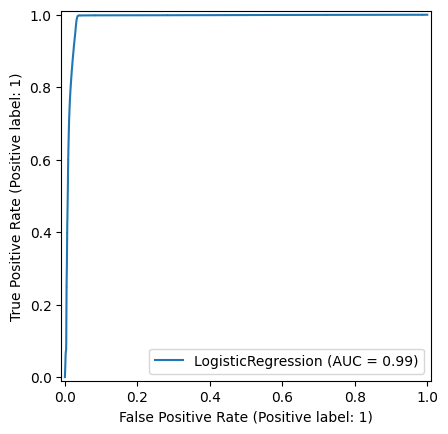

In [23]:
RocCurveDisplay.from_estimator(sk_model,x_train,y_train)

# Model performance 
Model  is highly accurate on training dataset with AUC as .99 . That means the model is able to classify and predict target variable value as 0 and 1 with high accuracy. Since the data is highly imbalanced and no domain knowledge is available , this could be a case of over-fitting. 


### Model testing on Test Dataset

In [20]:
# load test data set and transform the dataset
test_x = pd.read_csv(r"D:\github\DataScience\GST_Hackathon\resources\test\X_Test_Data_Input.csv")
test_y = pd.read_csv(r"D:\github\DataScience\GST_Hackathon\resources\test\Y_Test_Data_Target.csv")

In [21]:
# Test data preparation
df_test = pd.merge(test_x,test_y,on="ID")

#dropping the ID column
df_test_transformed=df_test.drop('ID', axis=1)

# drop redundant columns
df_test_transformed=df_test_transformed.drop(['Column3','Column10','Column11','Column12'], axis=1)

# data cleaning 
df_test_transformed['Column0'] =  df_test_transformed['Column0'].fillna(0)

col4_median_test = df_test_transformed['Column4'].median()
df_test_transformed['Column4'] =  df_test_transformed['Column4'].fillna(col4_median_test)

# from sklearn.preprocessing import PowerTransformer
# missing value transformation 
df_test_transformed['Column5'] =  df_test_transformed['Column5'].fillna(0)

#pt = PowerTransformer(method='yeo-johnson')
df_test_transformed['Column5'] = pt.fit_transform(df_test_transformed[['Column5']])

# missing value transformation 
df_test_transformed['Column6'] =  df_test_transformed['Column6'].fillna(0)

df_test_transformed['Column7'] = pt.fit_transform(df_test_transformed[['Column7']])

# missing value transformation 
df_test_transformed['Column8'] =  df_test_transformed['Column8'].fillna(0)
# transform for skweness
df_test_transformed['Column8'] = pt.fit_transform(df_test_transformed[['Column8']])

# missing value transformation 
df_test_transformed['Column9'] =  df_test_transformed['Column9'].fillna(0)
# transform for skweness
df_test_transformed['Column9'] = pt.fit_transform(df_test_transformed[['Column9']])

# missing value transformation 
df_test_transformed['Column14'] =  df_test_transformed['Column14'].fillna(0)
# transform for skweness
df_test_transformed['Column14'] = pt.fit_transform(df_test_transformed[['Column14']])

# missing value transformation 
df_test_transformed['Column15'] =  df_test_transformed['Column15'].fillna(0)
# transform for skweness
df_test_transformed['Column15'] = pt.fit_transform(df_test_transformed[['Column15']])

# transform for skweness
df_test_transformed['Column17'] = pt.fit_transform(df_test_transformed[['Column17']])

### Prediction on Test Data

In [ ]:
x_test = df_test_transformed.loc[:,df_test_transformed.columns !='target']
y_test = df_test_transformed[['target']]

### Model Evaluation  -  Test data

eval_acc_test = sk_model.score(x_test,y_test)
print(eval_acc_test)

In [ ]:
preds_test = sk_model.predict(x_test)
auc_score_test = roc_auc_score(y_test,preds_test)
print(f"Auc Score: {auc_score_test:.3%}")
print(f"Eval Accuracy: {eval_acc_test:.3%}")

In [ ]:
RocCurveDisplay.from_estimator(sk_model,x_test,y_test)